 # Uji Tunggal


0: 800x800 1 jalan retak, 15 lubangs, 354.3ms
Speed: 7.0ms preprocess, 354.3ms inference, 11.8ms postprocess per image at shape (1, 3, 800, 800)


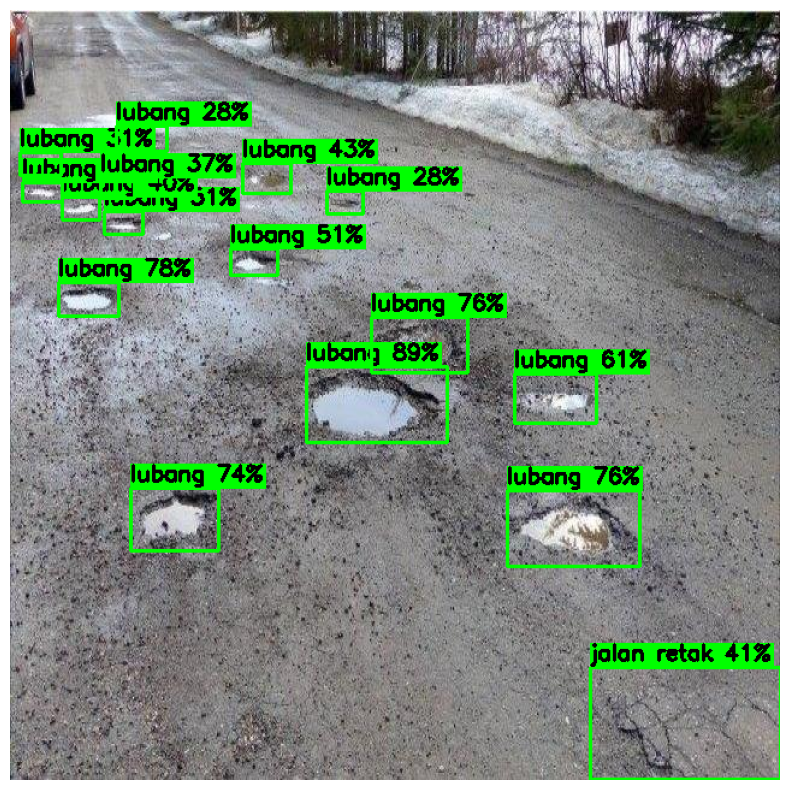

In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv8 model
model_path = "best.pt"
model = YOLO(model_path)

# Path to the image file
image_path = "holeTest.jpg"  # Replace with your image path

# Load image
image = cv2.imread(image_path)

# Convert image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform detection
results = model(image_rgb)

# Process results
for result in results:
    boxes = result.boxes  # Detection boxes
    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy()  # Box coordinates [x1, y1, x2, y2]
        conf = box.conf[0].cpu().numpy()  # Confidence score
        cls = int(box.cls[0].cpu().numpy())  # Detected class

        # Draw detection boxes and labels
        if cls in range(len(model.names)):  # Check if class index is valid
            x1, y1, x2, y2 = map(int, xyxy)
            conf_percent = conf * 100  # Convert to percentage
            label = f"{model.names[cls]} {conf_percent:.0f}%"  # Format as percentage without decimal

            # Set color to bright green (similar to the uploaded image)
            color = (0, 255, 0)
            thickness = 2  # Moderate thickness

            # Draw rectangle with desired thickness
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, thickness)

            # Calculate label size for better placement
            (label_width, label_height), baseline = cv2.getTextSize(
                label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2
            )

            # Draw filled rectangle for label background
            cv2.rectangle(
                image_rgb,
                (x1, y1),
                (x1 + label_width, y1 - label_height - baseline),
                color,
                cv2.FILLED,
            )

            # Draw label text inside the box
            cv2.putText(
                image_rgb,
                label,
                (x1, y1 - baseline),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 0, 0),  # Black color for text
                2,
            )

# Display image with detections using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# # Save image with detections
# output_path = "hasil.jpg"  # Replace with your desired output path
# cv2.imwrite(output_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


# Uji Majemuk


0: 800x800 4 lubangs, 342.4ms
Speed: 6.4ms preprocess, 342.4ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 jalan retak, 1 lubang, 336.2ms
Speed: 5.5ms preprocess, 336.2ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 lubang, 274.5ms
Speed: 4.8ms preprocess, 274.5ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 (no detections), 246.8ms
Speed: 4.0ms preprocess, 246.8ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 jalan retak, 2 lubangs, 259.8ms
Speed: 5.5ms preprocess, 259.8ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 2 lubangs, 256.3ms
Speed: 3.5ms preprocess, 256.3ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 lubang, 247.7ms
Speed: 4.0ms preprocess, 247.7ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 jalan retak, 1 lubang, 258.8ms
Speed: 4.6ms prepro

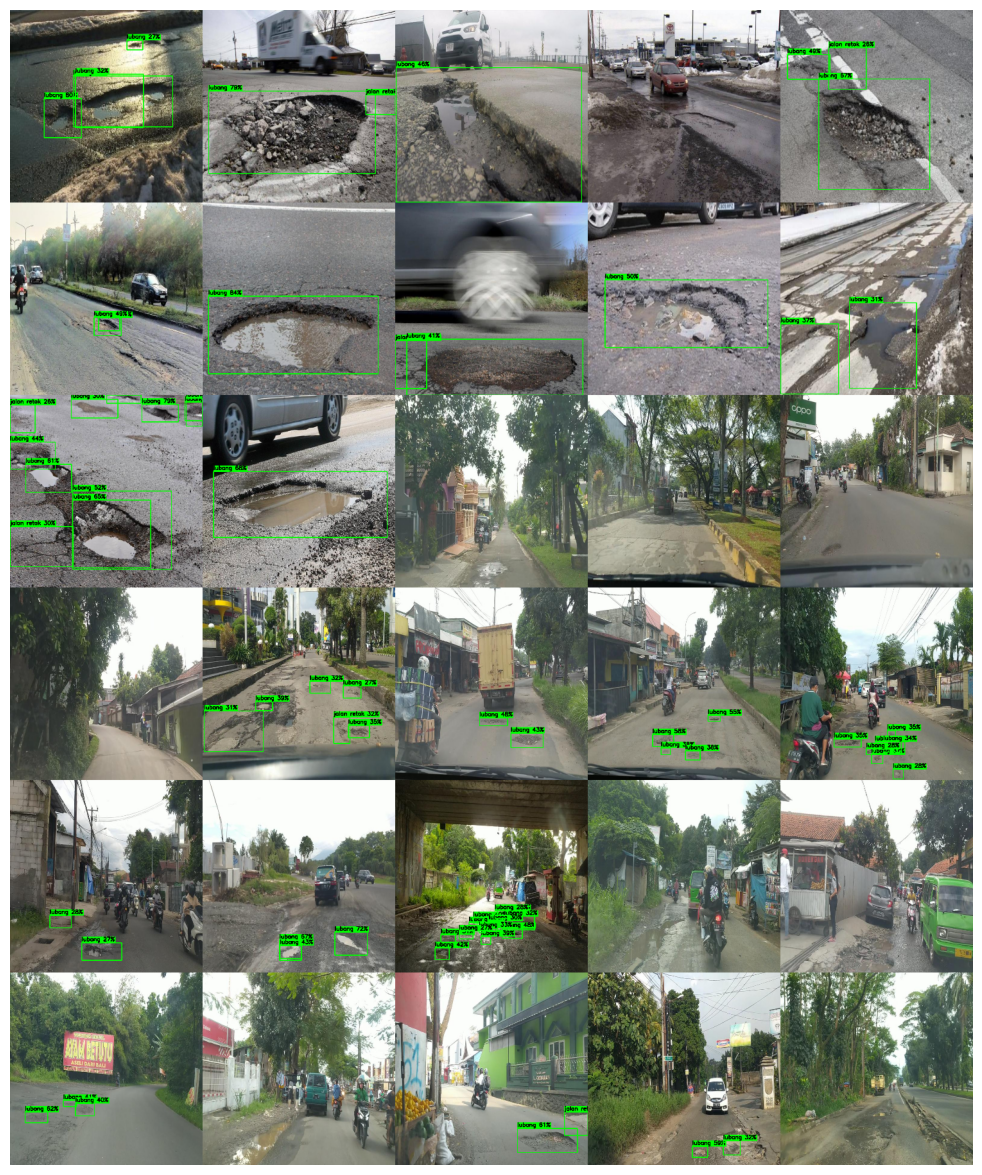

True

In [5]:
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv8 model
model_path = "best.pt"
model = YOLO(model_path)

# Path to the folder containing images
folder_path = "UjiAkurasi/sample"  # Ganti dengan path folder Anda

# Create an empty list to hold images with detections
detected_images = []

# Number of images per row (you can adjust this number)
images_per_row = 5

# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)

        # Load image
        image = cv2.imread(image_path)

        # Convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform detection
        results = model(image_rgb)

        # Process results
        for result in results:
            boxes = result.boxes  # Detection boxes
            for box in boxes:
                xyxy = box.xyxy[0].cpu().numpy()  # Box coordinates [x1, y1, x2, y2]
                conf = box.conf[0].cpu().numpy()  # Confidence score
                cls = int(box.cls[0].cpu().numpy())  # Detected class

                # Draw detection boxes and labels
                if cls in range(len(model.names)):  # Check if class index is valid
                    x1, y1, x2, y2 = map(int, xyxy)
                    conf_percent = conf * 100  # Convert to percentage
                    label = f"{model.names[cls]} {conf_percent:.0f}%"  # Format as percentage without decimal

                    # Set color to bright green
                    color = (0, 255, 0)
                    thickness = 2  # Moderate thickness

                    # Draw rectangle with desired thickness
                    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, thickness)

                    # Calculate label size for better placement
                    (label_width, label_height), baseline = cv2.getTextSize(
                        label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2
                    )

                    # Draw filled rectangle for label background
                    cv2.rectangle(
                        image_rgb,
                        (x1, y1),
                        (x1 + label_width, y1 - label_height - baseline),
                        color,
                        cv2.FILLED,
                    )

                    # Draw label text inside the box
                    cv2.putText(
                        image_rgb,
                        label,
                        (x1, y1 - baseline),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (0, 0, 0),  # Black color for text
                        2,
                    )

        # Resize images to the same size for consistent grid layout (optional)
        image_rgb = cv2.resize(image_rgb, (300, 300))  # Resize to 300x300 pixels

        # Append the processed image to the list
        detected_images.append(image_rgb)

# Create a blank list to hold rows of images
rows = []

# Combine images into rows
for i in range(0, len(detected_images), images_per_row):
    row = cv2.hconcat(detected_images[i:i + images_per_row])
    rows.append(row)

# Combine all rows into the final grid image
final_image = cv2.vconcat(rows)

# Display the final grid image
plt.figure(figsize=(15, 15))
plt.imshow(final_image)
plt.axis('off')  # Hide axes
plt.show()

# # Save the final grid image
# output_path = "hasilUji.jpg"  # Ganti dengan path yang Anda inginkan
# cv2.imwrite(output_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))
